## Ch 7 - Channels with State

Reference: Ch 7 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
    random_seed = 4321          # Random seed for example searching
)

### Thm 7.1 (Compound Channels)

Skipped

### Thm 7.2 (Causal Channel State Information)

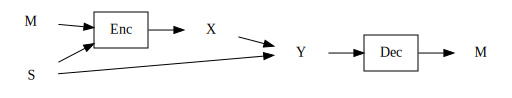

In [2]:
M, X, S, Y = rv("M, X, S, Y")
R = real("R")

# Define channel with state available causally at encoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_node(M+S, X, rv_in_causal = S,
                       label = "Enc") # Encoder maps M, S to X
model.add_edge(S+X, Y)                # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")   # Decoder maps Y to M

model.graph()                         # Draw diagram

In [3]:
C = model.maximum(R, R) # Get capacity, recovers [Shannon 1958]
C.lower_bound()

(( ( indep(A_M, S) )
 &( markov(A_M, S+X, Y) ) ).exists(A_M)).maximum(I(A_M&Y))

In [4]:
r = model.get_inner(is_proof=True) # Achievability proof
r.display(note=True)

<IPython.core.display.Math object>

In [5]:
# Converse proof
model.proof_outer(r)

In [6]:
(C <= I(X & Y | S)).solve()  # An upper bound on C

True

In [7]:
(indep(X, S) >> (C >= I(X & Y))).solve() # A lower bound on C

True
CompArray(
[[A_M, X]])

### Thm 7.3 (Noncausal Channel State Information)

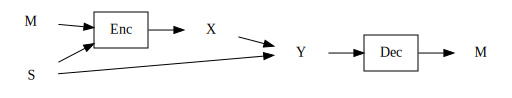

In [8]:
M, X, S, Y = rv("M, X, S, Y")
R = real("R")

# Define channel with state available noncausally at encoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_node(M+S, X, label = "Enc") # Encoder maps M, S to X
model.add_edge(S+X, Y)                # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")   # Decoder maps Y to M

model.graph()                         # Draw diagram

In [9]:
# Get capacity, recovers [Gel'fand-Pinsker 1980], [Heegard-El Gamal 1983]
C = model.maximum(R, R)
C.lower_bound()

(( ( I(A_M&S) <= I(A_M&Y) )
 &( markov(A_M, S+X, Y) ) ).exists(A_M)).maximum((I(A_M&Y)-I(A_M&S)))

In [10]:
r = model.get_inner(is_proof=True) # Achievability proof
r.display(note=True)

<IPython.core.display.Math object>

In [11]:
# Converse proof
model.proof_outer(r)

In [12]:
(C <= I(X & Y | S)).solve()  # An upper bound on C

True

In [13]:
# The program makes an implicit assumption that the empirical joint
# distribution of (S,X,Y) is fixed, so we are not free to choose
# X independent of S. Hence, the following test on lower bound fails:
# bool(C >= I(X & Y))
# To show the lower bound, we need an additional assumption:
(indep(X, S) >> (C >= I(X & Y))).solve()

True
CompArray(
[[A_M, X]])

### Thm 7.4 (Gaussian, Writing on Dirty Paper)

Skipped

### Thm 7.5 (Coded State Information)


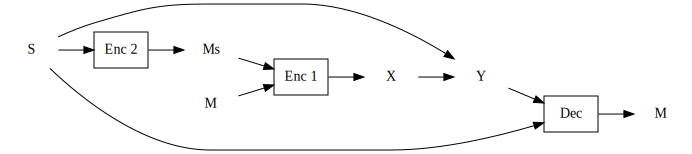

In [14]:
M, X, S, Y = rv("M, X, S, Y")
Ms = rv("Ms", latex = "M_s")
R = real("R")
Rs = real("Rs", latex = "R_s")

# Define channel with coded state information at encoder [Heegard-El Gamal 1983]
model = CodingModel()
model.set_rate(M, R)                     # The rate of M is R
model.set_rate(Ms, Rs)                   # The rate of Ms is Rs
model.add_node(S, Ms, label = "Enc 2")   # Encoder 2 maps S to Ms
model.add_node(M+Ms, X, label = "Enc 1") # Encoder 1 maps M, Ms to X
model.add_edge(S+X, Y)                   # Channel S,X -> Y
model.add_node(Y+S, M, label = "Dec")    # Decoder maps Y, S to M

model.graph()                            # Draw diagram

In [15]:
# Get capacity region
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

In [16]:
# Converse proof
model.proof_outer(r)

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 7.
-  S. I. Gel'fand and M. S. Pinsker, "Coding for channel with random parameters," Probl. Contr. and Inf. Theory, vol. 9, no. 1, pp. 19–31, 1980.
-  C. E. Shannon, "Channels with side information at the transmitter," IBM journal of Research and Development, vol. 2, no. 4, pp. 289–293, 1958.
- C. Heegard and A. El Gamal. "On the capacity of computer memory with defects." IEEE transactions on Information theory 29.5 (1983): 731-739.